# ML4N - Group Project 7
# Analysing Adversarial Attacks on Tabular Data Classifiers

In [1]:
# import needed python libraries
# Per ora ci ho messo quanta più roba potesse servire, in seguito rimuoviamo ciò che non serve 

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#nn stuff
import torch
from torch import nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision import transforms

# 1 Data exploration and preprocessing

1.1 Dataset Acquisition

In [2]:
#List of Attributes for dataset acquired from german.doc
#good/bad is the label 1 means good customer while 2 means bad
attributes = ["Status_account", "Duration", "Credit_history","Purpose",
             "Credit_amount","Savings_account/bonds","Employment_since","Install_rate",
              "Personal_status_sex","debtors_guarantors","Present_residence_since",
              "Property","Age","Other_install_plans","Housing","No_credits","Job",
              "No_people_liable","Telephone","foreign_worker","good/bad"] 

#Acquiring dataset from german.data file
df = pd.read_csv("german.data", sep=' ', names = attributes)
df

,Status_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Employment_since,Install_rate,Personal_status_sex,debtors_guarantors,...,Property,Age,Other_install_plans,Housing,No_credits,Job,No_people_liable,Telephone,foreign_worker,good/bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


1.2 Data Preprocessing

In [3]:
#Qualitative attributes that do not require encoding 
to_remove = ["Duration","Credit_amount","Install_rate","Present_residence_since",
             "Age","No_credits","No_people_liable","good/bad"] 

#Creating the list with the categorical attributes to be encoded
to_be_encoded = attributes.copy()
for el in to_remove:
    to_be_encoded.remove(el)

    
#K normalizing only the numerical values before one hot encoding for later uses 
scaler2 = MinMaxScaler()
df_normalized_with_categorical = df.copy()
df_normalized_with_categorical[to_remove] = scaler2.fit_transform(df_normalized_with_categorical[to_remove])
#display(df_normalized_with_categorical)

#Using One Hot Encoding to transform categorical attributes into qualitative ones
df_encoded = pd.get_dummies(df, columns=to_be_encoded, dtype = int)
display(df_encoded)

#Normalization between [0,1] and split into 80% training and 20% test 
#Note: Might be worth using k-fold Cross Validation or some other way
scaler = MinMaxScaler()


#K creation of the pandas dataframe of the normalized values
array_df_encoded2 = scaler.fit_transform(df_encoded)

df_normalized = pd.DataFrame(array_df_encoded2, columns=df_encoded.columns)
display(df_normalized)

features = df_encoded.columns.drop("good/bad")
X, X_test, y, y_test = train_test_split(
    df_encoded[features], # X
    df_encoded['good/bad'], # y
    stratify = df_encoded['good/bad'], # stratify the dataset based on class labels
    train_size = 0.8, # percentage of training set
    random_state = 15 
)


X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#Clearly define categories or classes ????? Maybe inside report????


,Duration,Credit_amount,Install_rate,Present_residence_since,Age,No_credits,No_people_liable,good/bad,Status_account_A11,Status_account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,2,1,0,...,0,1,0,0,1,0,0,1,1,0


,Duration,Credit_amount,Install_rate,Present_residence_since,Age,No_credits,No_people_liable,good/bad,Status_account_A11,Status_account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign_worker_A201,foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


1.3 Exploratory Data Analysis


Histogram with the means of critical data differences between people whose loan is accepted("good people") and people whose isn't ("bad people"):



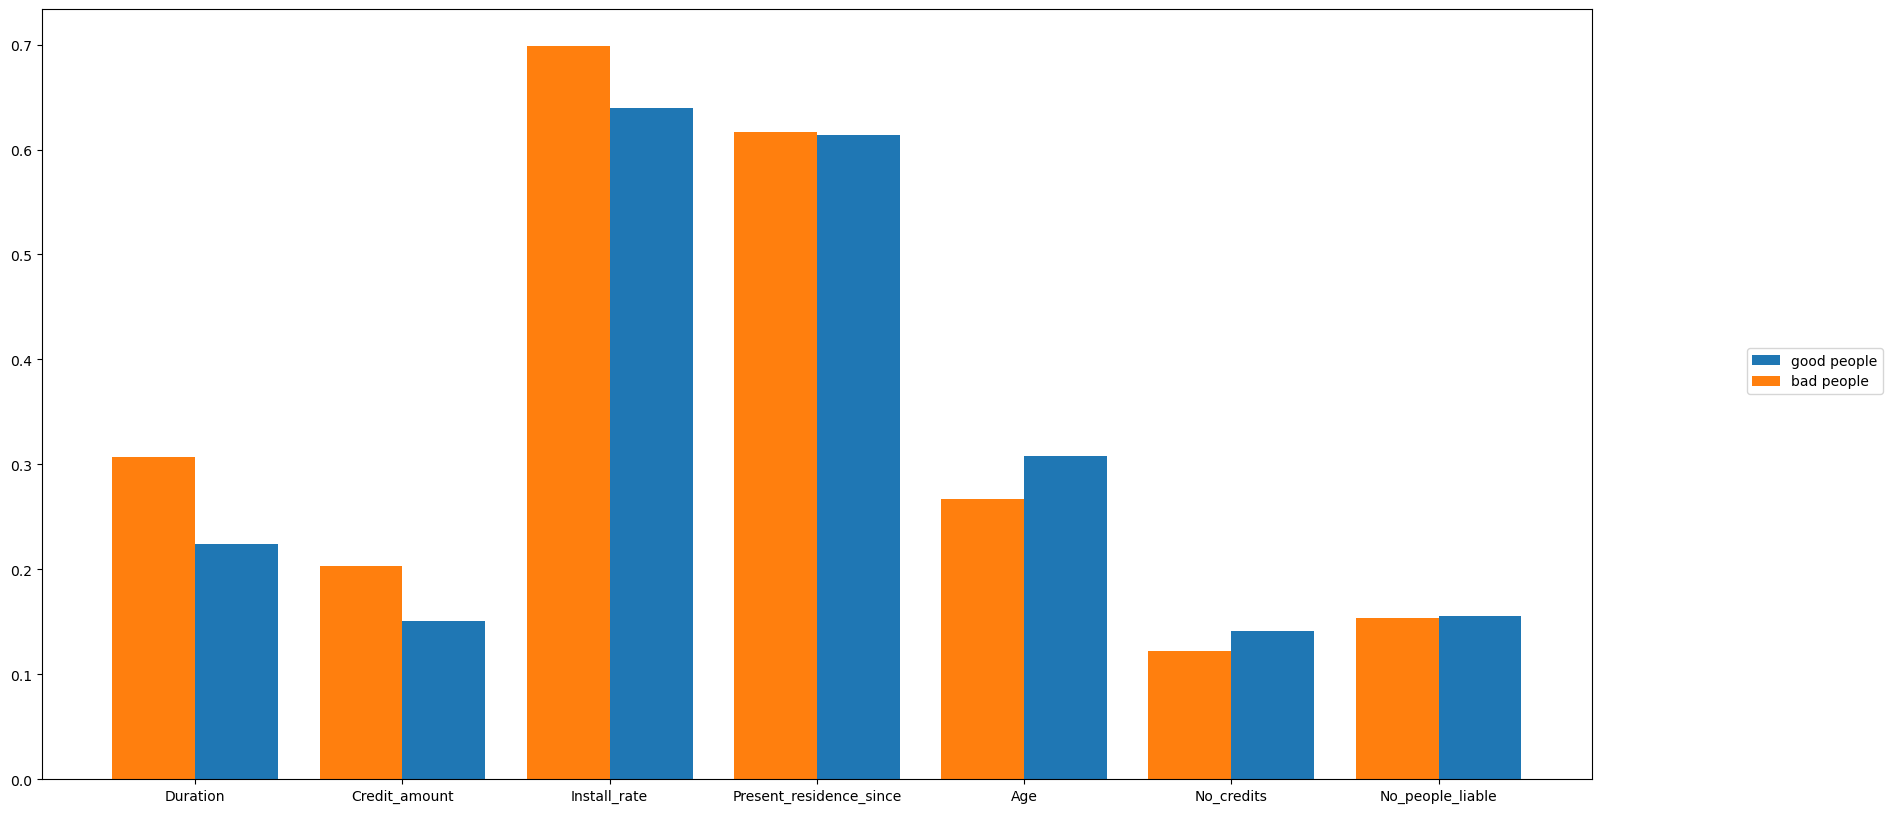

normal numerical


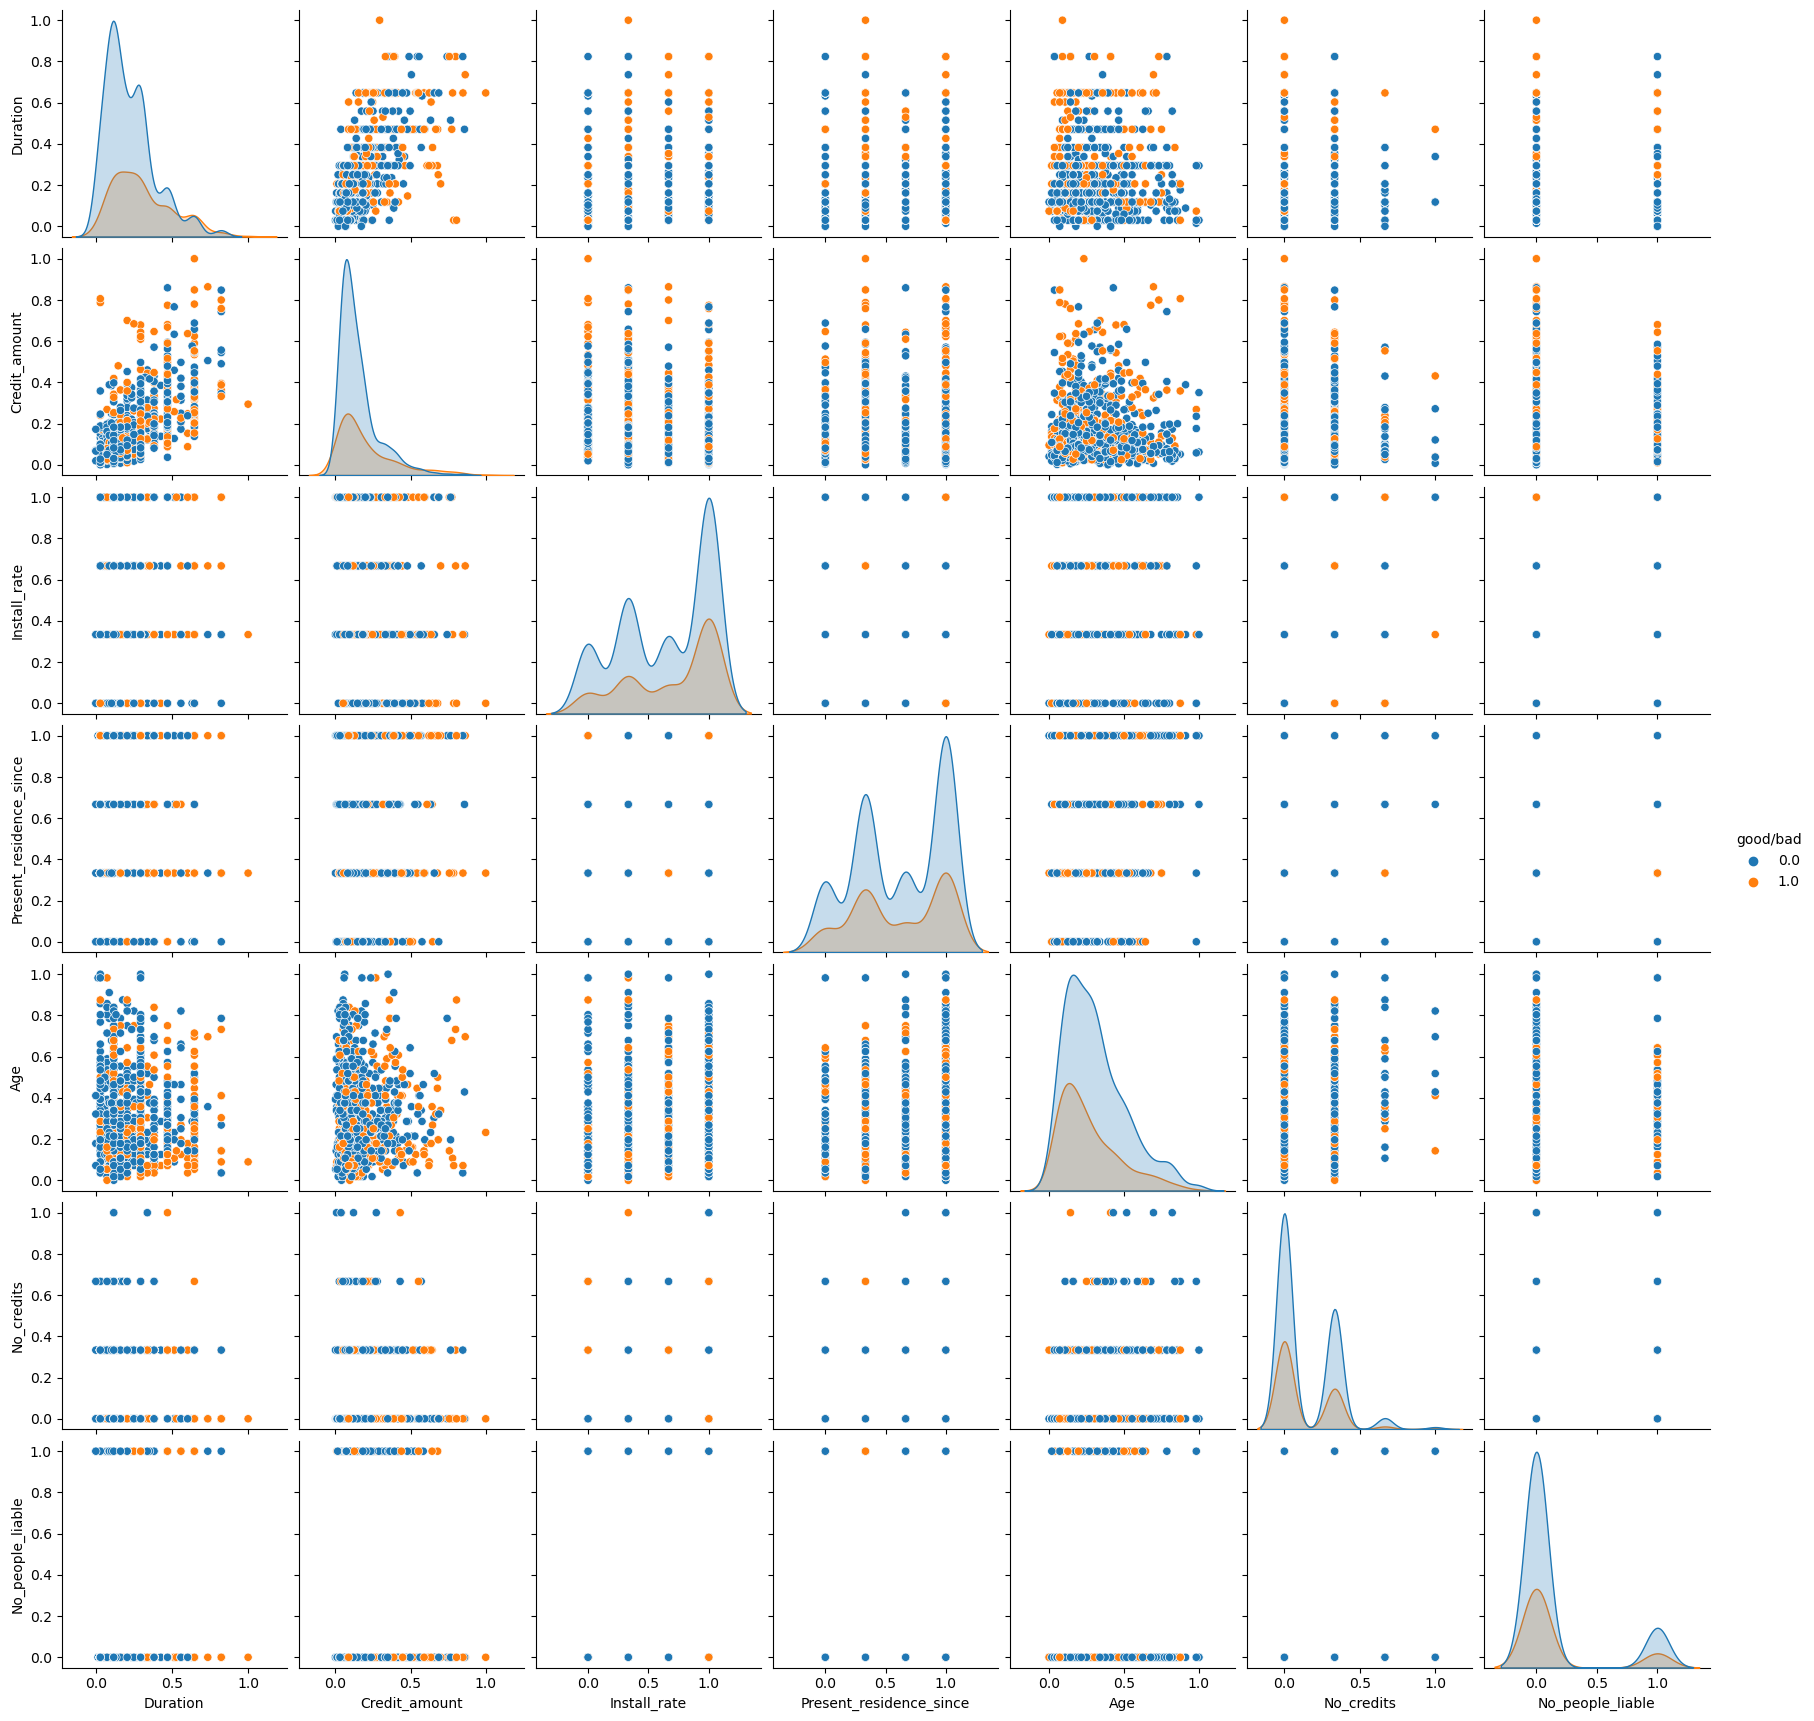

In [4]:
####### Histograms of average values
print("\nHistogram with the means of critical data differences between people whose loan is accepted(\"good people\") and people whose isn't (\"bad people\"):\n")

### removing useless columns for means

## Creating the list with the categorical attributes to be encoded
to_remove_new = []
attributes_numerical = ["Duration", "Credit_amount", "Install_rate",
              "Present_residence_since","Age","No_credits",
              "No_people_liable","good/bad"] 


for el in df_normalized.columns.tolist():
    if el in attributes_numerical:
        pass
    else:
        to_remove_new.append(el)
#print(to_remove_new)

df_normalized_numerical = df_normalized.drop(to_remove_new, axis = 1)
#display(df_normalized_numerical)


####### separating "good customer" from "bad customer" data

df_normalized_good = df_normalized_numerical.loc[df_normalized["good/bad"]==0.0]
#display(df_normalized_good)
df_normalized_bad = df_normalized_numerical.loc[df_normalized["good/bad"]==1.0]
#display(df_normalized_good)


####### removing the label column

df_normalized_no_label_good = df_normalized_good.drop("good/bad", axis = 1)
df_normalized_no_label_bad = df_normalized_bad.drop("good/bad", axis = 1)
# display(df_normalized_no_label_good)

####### calculating means

columns_means_good = df_normalized_no_label_good.mean().tolist()
columns_means_bad = df_normalized_no_label_bad.mean().tolist()

####### showing the bar plot
x = np.arange(7)
width = 0.4
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x+width/2, columns_means_good, width=0.4, label="good people")
ax.bar(x-width/2, columns_means_bad, width=0.4, label="bad people")
ax.set_xticks(x, df_normalized_no_label_good.columns.tolist())
ax.legend(loc=(1.1,0.5))
plt.show()


####### Scatter plots of most interestring features????
print("normal numerical")
sns.pairplot(df_normalized_numerical, hue='good/bad')
plt.show()
# for x in ["A11","A12","A13","A14"]:
#     print(f"Status_account {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Status_account"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A40","A41","A42", "A43", "A44", "A45", "A46", "A47" ,"A48" ,"A49" ,"A410" ]:
#     print(f"Purpose {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Purpose"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A61","A62","A63", "A64", "A65"]:
#     print(f"Savings_account/bonnds {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Savings_account/bonds"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A71","A72","A73", "A74", "A75"]:
#     print(f"Employment_since {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Employment_since"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A91","A92","A93", "A94", "A95"]:
#     print(f"Personal_status_sex {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Personal_status_sex"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A101","A102","A103"]:
#     print(f"debtors_guarantors {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["debtors_guarantors"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A121","A122","A123", "A124"]:
#     print(f"Property {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Property"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A141","A142","A143"]:
#     print(f"Other_install_plans {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Other_install_plans"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A151","A152","A153"]:
#     print(f"Housing {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Housing"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A171","A172","A173", "A174"]:
#     print(f"Job {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Job"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A191","A192"]:
#     print(f"Telephone {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Telephone"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A201", "A202"]:
#     print(f"foreign_worker {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["foreign_worker"]==x, to_remove], hue='good/bad')
#     plt.show()

    
#     

####### Correlation Matrices

####### Provide insights into under-lying patterns and, most importantly, 
####### identify features significantly influencing loan risk classification







## notes:
#56
# 1: Duration - Bad people usually have a longer duration of the loan in respect of good people (~10% more)
# 2: Credit Amount - Bad people usually have a bigger Credit respect of good people (~5% more)
# 3: Install rate - Bad people usually have a bigger installation rate of the loan in respect of good people (~5% more)
# 4: Age - Bad people are usually youger than good people (~5% less)

In [5]:
#splitting data into train test and val
X = scaler.fit_transform(df_encoded[features])
y = df_normalized['good/bad']

print(f"X is: {len(X)}")
print(f"y is: {len(y)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, train_size=0.5, random_state=15)
y_train, y_val, y_test = np.ravel(y_train), np.ravel(y_val), np.ravel(y_test)

print(f"X train is: {len(X_train)}")
print(f"y train is: {len(y_train)}")
print(f"X val is: {len(X_val)}")
print(f"y val is: {len(y_val)}")
print(f"X test is: {len(X_test)}")
print(f"y test is: {len(y_test)}")

#transform numpy array to pytorch tensor
X_train_t = torch.tensor(X_train, dtype=torch.float)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_val_t = torch.tensor(X_val, dtype=torch.float)
y_val_t = torch.tensor(y_val, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float)
y_test_t = torch.tensor(y_test, dtype=torch.long)

X is: 1000
y is: 1000
X train is: 400
y train is: 400
X val is: 400
y val is: 400
X test is: 200
y test is: 200


In [7]:
#defininf the nn model
class Model_classification_multi(nn.Module): 

    def __init__(self, in_features, out_features, hidden_1, hidden_2, hidden_3):
        super().__init__()

        # another way to define the architecture of neural network
        self.layers = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_1, out_features=hidden_2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_2, out_features=hidden_3),
            nn.ReLU(),
            nn.Linear(in_features=hidden_2, out_features=out_features), 
        )

    # define feedforward process
    def forward(self, x):
        out = F.sigmoid(self.layers(x))
        return out

# set a random seed 
torch.manual_seed(8)

# initialize the model with the correspoding parameters
model = Model_classification_multi(
    in_features = X_train_t.shape[-1], 
    out_features = np.unique(y_train).shape[0], 
    hidden_1 = 1063, 
    hidden_2 = 1063,
    hidden_3 = 1063
)

# define the loss function
loss_fn = nn.CrossEntropyLoss()

# define the optimizer (pass the parameters (model) that you want to optimize, and the learning rate)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-4)

In [ ]:
loss_train_all = []
loss_val_all = []
loss_test_all = []
acc_train_all = []
acc_val_all = []
acc_test_all = []
epochs = 1000

#define the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))
    return acc


for epoch in range(epochs):

    # model training phase
    model.train()
    y_prob = model(X_train_t).squeeze() # get the output probability of predictions
    loss = loss_fn(y_prob, y_train_t) # calculate the loss
    optimizer.zero_grad() # reset the gradients of model parameters
    loss.backward() # backpropagate the prediction loss
    optimizer.step() # adjust the parameters by the gradients 

    # model evaluation phase
    model.eval()
    
    # training set
    y_prob = model(X_train_t).squeeze()
    y_pred = torch.argmax(y_prob, dim=-1) # get the label
    acc_train = accuracy_fn(y_true=y_train_t, y_pred=y_pred)

    # validation set
    y_prob = model(X_val_t).squeeze()
    loss_val = loss_fn(y_prob, y_val_t) 
    y_pred = torch.argmax(y_prob, dim=-1) 
    acc_val = accuracy_fn(y_true=y_val_t, y_pred=y_pred)

    # test set
    y_prob = model(X_test_t).squeeze()
    loss_test = loss_fn(y_prob, y_test_t) 
    y_pred = torch.argmax(y_prob, dim=-1) 
    acc_test = accuracy_fn(y_true=y_test_t, y_pred=y_pred)

    # collect results
    loss_train_all.append(loss.detach().numpy())
    loss_val_all.append(loss_val.item())
    loss_test_all.append(loss_test.item())
    acc_train_all.append(acc_train)
    acc_val_all.append(acc_val)
    acc_test_all.append(acc_test)

    print(f'Epoch: {epoch} | Train Loss: {loss:.5f}, Val Loss: {loss_val:.5f}, Test Loss: {loss_test:.5f}, Train Acc: {acc_train:.2f}, Val Acc: {acc_val:.2f}, Test Acc: {acc_test:.2f}') 

Epoch: 0 | Train Loss: 0.66715, Val Loss: 0.66190, Test Loss: 0.66171, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 1 | Train Loss: 0.66134, Val Loss: 0.65615, Test Loss: 0.65592, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 2 | Train Loss: 0.65550, Val Loss: 0.65034, Test Loss: 0.65010, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 3 | Train Loss: 0.64960, Val Loss: 0.64454, Test Loss: 0.64429, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 4 | Train Loss: 0.64369, Val Loss: 0.63882, Test Loss: 0.63855, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 5 | Train Loss: 0.63784, Val Loss: 0.63330, Test Loss: 0.63298, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 6 | Train Loss: 0.63217, Val Loss: 0.62810, Test Loss: 0.62774, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 7 | Train Loss: 0.62682, Val Loss: 0.62338, Test Loss: 0.62297, Train Acc: 0.70, Val Acc: 0.70, Test Acc: 0.70
Epoch: 8 | Train Loss: 0.62193, Val Loss: 0.61927, Test 